__Udacity Project 1 - Blog posting__

# Introduction

For the first project, I decided to analyse the Boston Air BnB Dataset for salience and correlations within the dataset.  

During this project I amgoing to apply the CRISP-DM Process which contains the following steps
1. Business Understanding
1. Data Understanding
1. Data Preparation
1. Data Modeling
1. Result Evalutation
1. Deployment

The deployment step will not be implemented here, since I have no direct influence on the AirBnB methods, but I will answer the questions mentioned previously.
Since the data available is quite alot, I will mix some of the data preparation setps (dropping some columns, etc.) with the data understanding step.

# Business understanding
Since Air BnB profits from rented out appartments, it is desireable that more hosts post their appartments on AirBnB and that the guests get the cheapest price for a stay.
Therefore, I want to provide the host, the highest revenue for their appartment, so that they list more assets on Air BnB. On the other hand, The customer should pay as few as possible, to get more customers to book their stay through Air BnB.

In summary, the questions to be answered are:
- What makes an asset valuable (high price)?
- How can hosts enhance their prices for their assets?
- What is the best time to book an appartment?

# Data cleaning

In [1]:
import pandas as pd
from datetime import datetime as dt
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection as modsel

%matplotlib inline

In [2]:
listings = pd.read_csv(r'../data/listings.csv')
calendar = pd.read_csv(r'../data/calendar.csv')
reviews = pd.read_csv(r'../data/reviews.csv')

Before the beginning of any analysis, we have to clean tha data a little bit. First of all we are going to take a look into the data that is provided by the AirBnB-Dataset.

There are three types of data available. The first dataset we have is a dataset of all the _istings_ avilable in Boston.  
In addition, we have two more datasets, that enrich the listings dataset, the _calendar_ and the _reviews_ dataset. As the name suggests, th calender dataset contains a celnder for the listings with information about the availablity of the listings, whereas the reviews datset contains the reviews, the visitors left for the listings. Bot datasets contain the listings id, which links the datasets.

Before starting the analysis, we are going to take a look into the lisitngs dataset, to see, what data is available. Firstly, we are going to take a look into the columns, to see what the columns say about the data.

## Listings

In [3]:
listings.columns.sort_values()

Index(['access', 'accommodates', 'amenities', 'availability_30',
       'availability_365', 'availability_60', 'availability_90', 'bathrooms',
       'bed_type', 'bedrooms', 'beds', 'calculated_host_listings_count',
       'calendar_last_scraped', 'calendar_updated', 'cancellation_policy',
       'city', 'cleaning_fee', 'country', 'country_code', 'description',
       'experiences_offered', 'extra_people', 'first_review',
       'guests_included', 'has_availability', 'host_about',
       'host_acceptance_rate', 'host_has_profile_pic', 'host_id',
       'host_identity_verified', 'host_is_superhost', 'host_listings_count',
       'host_location', 'host_name', 'host_neighbourhood', 'host_picture_url',
       'host_response_rate', 'host_response_time', 'host_since',
       'host_thumbnail_url', 'host_total_listings_count', 'host_url',
       'host_verifications', 'house_rules', 'id', 'instant_bookable',
       'interaction', 'is_location_exact', 'jurisdiction_names', 'last_review',
       

### Data droping
As we can see, there are a few columns, that seem like they have no actual value for us. For example, everything that contains a url, like `host_picture_url`, `host_url` are columns that obviously do not carry any relevant information for us. These URLs are probably needed for the UI, but do not have any value for the analysis. Therefore we are going to drop a few, to get a better overview of the relevant information. Hence we are going to drop the columns containing the word 'url'

In [4]:
# drop columns containing 'url'
before_len = listings.shape[1]
columns_to_drop = ['url' in icolumn for icolumn in listings.columns]
columns_to_drop = listings.columns[columns_to_drop]

listings.drop(labels=columns_to_drop,
              axis=1,
              inplace=True)

after_len = listings.shape[1]

print('%i columns dropped - %i columns left' % (before_len - after_len, after_len))

8 columns dropped - 87 columns left


In addition we are going to drop columns, that do not carry listing specific information for our dataset. For example the column _country\_code_ does not carry any listing specific information, since our dataset only contains lsitings from boston, hence all listings have the same coutry code. more columns like that exist, which should be dropped as well.

In [5]:
# drop columns have all the same entries
before_len = listings.shape[1]

columns_to_drop = [len(listings[icolumn].value_counts())<2 for icolumn in listings.columns]
columns_to_drop = listings.columns[columns_to_drop]

listings.drop(labels=columns_to_drop,
              axis=1,
              inplace=True)

after_len = listings.shape[1]

print('%i columns dropped - %i columns left' % (before_len - after_len, after_len))

12 columns dropped - 75 columns left


The columns we are left with can be seen below:

In [6]:
listings.set_index('id')

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
12147973,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...","Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,...,NaN,NaN,NaN,NaN,f,moderate,f,f,1,NaN
3075044,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,...,10.0,10.0,9.0,9.0,t,moderate,f,f,1,1.30
6976,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,"PUBLIC TRANSPORTATION: From the house, quick p...","I am living in the apartment during your stay,...","ABOUT ME: I'm a laid-back, friendly, unmarried...","I encourage you to use my kitchen, cooking and...",...,10.0,10.0,9.0,10.0,f,moderate,t,f,1,0.47
1436513,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,Roslindale is a lovely little neighborhood loc...,Please be mindful of the property as it is old...,There are buses that stop right in front of th...,The basement has a washer dryer and gym area. ...,We do live in the house therefore might be som...,- The bathroom and house are shared so please ...,...,10.0,10.0,10.0,10.0,f,moderate,f,f,1,1.00
7651065,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...","I love the proximity to downtown, the neighbor...",I have one roommate who lives on the lower lev...,From Logan Airport and South Station you have...,You will have access to the front and side por...,I love my city and really enjoy sharing it wit...,"Please no smoking in the house, porch or on th...",...,10.0,10.0,9.0,10.0,f,flexible,f,f,1,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373729,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,NaN,NaN,NaN,NaN,NaN,1. No damage to the house or furniture 2. No S...,...,10.0,10.0,8.0,9.0,t,strict,f,f,8,0.34
14844274,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",NaN,NaN,"There is green line, BU shuttle in front of th...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,f,strict,f,f,2,NaN
14585486,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,"Cambridge is a short walk into Boston, and set...","Depending on when you arrive, I can be here to...","Public transport is 5 minuts away, but walking...",The whole place including social areas is your...,NaN,NaN,...,Na

In [7]:
listings.columns.sort_values()

Index(['access', 'accommodates', 'amenities', 'availability_30',
       'availability_365', 'availability_60', 'availability_90', 'bathrooms',
       'bed_type', 'bedrooms', 'beds', 'calculated_host_listings_count',
       'calendar_updated', 'cancellation_policy', 'city', 'cleaning_fee',
       'description', 'extra_people', 'first_review', 'guests_included',
       'host_about', 'host_acceptance_rate', 'host_has_profile_pic', 'host_id',
       'host_identity_verified', 'host_is_superhost', 'host_listings_count',
       'host_location', 'host_name', 'host_neighbourhood',
       'host_response_rate', 'host_response_time', 'host_since',
       'host_total_listings_count', 'host_verifications', 'house_rules', 'id',
       'instant_bookable', 'interaction', 'is_location_exact', 'last_review',
       'latitude', 'longitude', 'market', 'maximum_nights', 'minimum_nights',
       'monthly_price', 'name', 'neighborhood_overview', 'neighbourhood',
       'neighbourhood_cleansed', 'notes', 'numb

### Data sorting

To further get isight into the data, the data is split into their datatypes.

In [8]:
# getting the numeric values
filter_mask = [listings[icolumn].dtype == float for icolumn in listings.columns]
filter_mask[0] = True # get the id of the listing so that the relation between the data is clear
filter_mask = listings.columns[filter_mask]
listings_numeric_df = listings[filter_mask]

# getting the string values
filter_mask = [listings[icolumn].dtype == 'O' for icolumn in listings.columns]
filter_mask[0] = True # get the id of the listing so that the relation between the data is clear
filter_mask = listings.columns[filter_mask]
listings_str_df = listings[filter_mask]

# getting the boolean
filter_mask = [listings[icolumn].dtype == bool for icolumn in listings.columns]
filter_mask[0] = True # get the id of the listing so that the relation between the data is clear
filter_mask = listings.columns[filter_mask]
listings_bool_df = listings[filter_mask]

listings_numeric_df.set_index('id', inplace=True);
listings_str_df.set_index('id', inplace=True);
listings_bool_df.set_index('id', inplace=True);

If we take a look into the data, we realize that this approach, did not quite work as expected. Some columns in the listings, that contain numeric values, as charges (e.g. `extra_people`, `cleaning fee`, etc.) are saved as strings. Same goes for boolean values, which are not marked as `True` or `False`but rather `t` and `f`. Hence we need to additionally work on the data afterwards.

In [9]:
listings_numeric_df.head()

,latitude,longitude,bathrooms,bedrooms,beds,square_feet,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
id,,,,,,,,,,,,,,
12147973,42.282619,-71.133068,1.5,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3075044,42.286241,-71.134374,1.0,1.0,1.0,NaN,94.0,10.0,9.0,10.0,10.0,9.0,9.0,1.30
6976,42.292438,-71.135765,1.0,1.0,1.0,NaN,98.0,10.0,9.0,10.0,10.0,9.0,10.0,0.47
1436513,42.281106,-71.121021,1.0,1.0,2.0,NaN,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.00
7651065,42.284512,-71.136258,1.5,1.0,2.0,NaN,99.0,10.0,10.0,10.0,10.0,9.0,10.0,2.25


In [10]:
listings_str_df.head(2)

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,...,security_deposit,cleaning_fee,extra_people,calendar_updated,first_review,last_review,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
id,,,,,,,,,,,,,,,,,,,,,
12147973,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...","Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,...,NaN,$35.00,$0.00,2 weeks ago,NaN,NaN,f,moderate,f,f
3075044,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,...,$95.00,$10.00,$0.00,a week ago,2014-06-01,2016-08-13,t,moderate,f,f


In [11]:
listings_bool_df.head()

""
id
12147973
3075044
6976
1436513
7651065


In order to further sort the string data, the columns have to be seperated manually and preprocessed, in order to use them as numeric or boolean vales respectively.

In [12]:
# Additional sorting
listings_str_df.columns

Index(['name', 'summary', 'space', 'description', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'city', 'zipcode', 'market', 'smart_location',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'extra_people', 'calendar_updated',
       'first_review', 'last_review', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification'],
      dtype='object')

In [13]:
expected_numeric = ['host_response_rate',
                    'host_acceptance_rate',
                    'price',
                    'weekly_price',
                    'monthly_price',
                    'security_deposit',
                    'cleaning_fee',
                    'extra_people']

expected_bool = ['host_is_superhost',
                 'host_has_profile_pic', 
                 'host_identity_verified',
                 'is_location_exact',
                 'instant_bookable',
                 'require_guest_profile_picture',
                 'require_guest_phone_verification']

In [14]:
# I know, I know, this is not cool, but I didn't get why it showed me this warning, even with `expected_numeric_df.loc[:, icolumn_name] = idata.str.replace('%','')` I go the same warning
import warnings
warnings.filterwarnings('ignore')

expected_numeric_df = listings_str_df[expected_numeric]

for icolumn_name, idata in expected_numeric_df.iteritems():
    expected_numeric_df[icolumn_name] = idata.str.replace('%','')
    expected_numeric_df[icolumn_name] = expected_numeric_df.loc[:, icolumn_name].str.replace('$','')
    expected_numeric_df[icolumn_name] = expected_numeric_df.loc[:, icolumn_name].str.replace(',','')

expected_numeric_df = expected_numeric_df.astype(float)
listings_str_df.drop(columns=expected_numeric, inplace=True)

In [15]:
expected_bool_df = listings_str_df[expected_bool]

for icolumn_name, idata in expected_bool_df.iteritems():
    expected_bool_df[icolumn_name] = idata.str.replace('f','')

expected_bool_df = expected_bool_df.astype(bool)
listings_str_df.drop(columns=expected_bool, inplace=True)

In [16]:
# concat the two dfs
listings_bool_df = pd.concat([listings_bool_df, expected_bool_df], axis=1)
listings_numeric_df = pd.concat([listings_numeric_df, expected_numeric_df], axis=1)

Now that we have cleaned and sorted the data, we can get insights in chapter 3.
The cleaned data from the listings can be seen below.

In [17]:
listings_numeric_df.head(3)

,latitude,longitude,bathrooms,bedrooms,beds,square_feet,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,review_scores_value,reviews_per_month,host_response_rate,host_acceptance_rate,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
id,,,,,,,,,,,,,,,,,,,,,
12147973,42.282619,-71.133068,1.5,2.0,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,250.0,NaN,NaN,NaN,35.0,0.0
3075044,42.286241,-71.134374,1.0,1.0,1.0,NaN,94.0,10.0,9.0,10.0,...,9.0,1.30,100.0,100.0,65.0,400.0,NaN,95.0,10.0,0.0
6976,42.292438,-71.135765,1.0,1.0,1.0,NaN,98.0,10.0,9.0,10.0,...,10.0,0.47,100.0,88.0,65.0,395.0,1350.0,NaN,NaN,20.0


In [18]:
listings_str_df.head(2)

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,...,market,smart_location,property_type,room_type,bed_type,amenities,calendar_updated,first_review,last_review,cancellation_policy
id,,,,,,,,,,,,,,,,,,,,,
12147973,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...","Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,...,Boston,"Boston, MA",House,Entire home/apt,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",2 weeks ago,NaN,NaN,moderate
3075044,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,...,Boston,"Boston, MA",Apartment,Private room,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",a week ago,2014-06-01,2016-08-13,moderate


In [19]:
listings_bool_df.head(3)

,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,instant_bookable,require_guest_profile_picture,require_guest_phone_verification
id,,,,,,,
12147973,False,True,False,True,False,False,False
3075044,False,True,True,True,True,False,False
6976,True,True,True,True,False,True,False


## Reviews
Before we get into the data understanding we have to take a look into the reviews data as well. As we can see below, the revies data consist of less columns and is already pretty clear.
We can still check a few things, for example, if the dates are saved as python datetime or if the reviewer_ids have the same format all the time.


In [20]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [21]:
isinstance(reviews.date[0], dt)

False

As we can see here, the dates are not actually pandas datetimes and therefore need to be formated

In [22]:
reviews.date = [dt.strptime(idate, '%Y-%m-%d') for idate in reviews.date]

In [23]:
isinstance(reviews.date[0], dt)

True

In [24]:
reviews.set_index('listing_id', inplace=True)

In [25]:
reviews.head()

,id,date,reviewer_id,reviewer_name,comments
listing_id,,,,,
1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


## Calendar

The calendar dataset is similarly clean as the reviews dataset, but the dates are not in the same format as well, so here we go again:


In [26]:
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [27]:
isinstance(calendar.date[0], dt)

False

In [28]:
calendar.date = [dt.strptime(idate, '%Y-%m-%d') for idate in calendar.date]

In [29]:
calendar.set_index('listing_id', inplace=True)

In [30]:
calendar.head()

,date,available,price
listing_id,,,
12147973,2017-09-05,f,NaN
12147973,2017-09-04,f,NaN
12147973,2017-09-03,f,NaN
12147973,2017-09-02,f,NaN
12147973,2017-09-01,f,NaN


The availability is not boolean, so we have to replace them aswell. and as we can see further below, the price is svaed as a string, which we have to fix too.
Since we did that for the listings, I won't comment on that.

In [31]:
temp = calendar.available.str.replace('f', '')
calendar.loc[:,'available'] = temp.str.replace('t', 'a').astype(bool)

In [32]:
calendar.head()

,date,available,price
listing_id,,,
12147973,2017-09-05,False,NaN
12147973,2017-09-04,False,NaN
12147973,2017-09-03,False,NaN
12147973,2017-09-02,False,NaN
12147973,2017-09-01,False,NaN


In [33]:
calendar.price[~calendar.price.isna()]

listing_id
3075044     $65.00
3075044     $65.00
3075044     $65.00
3075044     $75.00
3075044     $75.00
             ...  
14504422    $62.00
14504422    $62.00
14504422    $62.00
14504422    $62.00
14504422    $62.00
Name: price, Length: 643037, dtype: object

In [34]:
calendar.price[~calendar.price.isna()] = [float(iprice[1:].replace(',','')) for iprice in calendar.price[~calendar.price.isna()]]

In [35]:
calendar.price[~calendar.price.isna()]

listing_id
3075044     65.0
3075044     65.0
3075044     65.0
3075044     75.0
3075044     75.0
            ... 
14504422    62.0
14504422    62.0
14504422    62.0
14504422    62.0
14504422    62.0
Name: price, Length: 643037, dtype: object

In [36]:
calendar.head()

,date,available,price
listing_id,,,
12147973,2017-09-05,False,NaN
12147973,2017-09-04,False,NaN
12147973,2017-09-03,False,NaN
12147973,2017-09-02,False,NaN
12147973,2017-09-01,False,NaN


## Summary
In the following, you can see the cleaned datasets, which are also sorted newly.

In [37]:
listings_numeric_df.head(3)

,latitude,longitude,bathrooms,bedrooms,beds,square_feet,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,review_scores_value,reviews_per_month,host_response_rate,host_acceptance_rate,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
id,,,,,,,,,,,,,,,,,,,,,
12147973,42.282619,-71.133068,1.5,2.0,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,250.0,NaN,NaN,NaN,35.0,0.0
3075044,42.286241,-71.134374,1.0,1.0,1.0,NaN,94.0,10.0,9.0,10.0,...,9.0,1.30,100.0,100.0,65.0,400.0,NaN,95.0,10.0,0.0
6976,42.292438,-71.135765,1.0,1.0,1.0,NaN,98.0,10.0,9.0,10.0,...,10.0,0.47,100.0,88.0,65.0,395.0,1350.0,NaN,NaN,20.0


In [38]:
listings_str_df.head(2)

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,...,market,smart_location,property_type,room_type,bed_type,amenities,calendar_updated,first_review,last_review,cancellation_policy
id,,,,,,,,,,,,,,,,,,,,,
12147973,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...","Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,...,Boston,"Boston, MA",House,Entire home/apt,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",2 weeks ago,NaN,NaN,moderate
3075044,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,...,Boston,"Boston, MA",Apartment,Private room,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",a week ago,2014-06-01,2016-08-13,moderate


In [39]:
listings_bool_df.head(3)

,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,instant_bookable,require_guest_profile_picture,require_guest_phone_verification
id,,,,,,,
12147973,False,True,False,True,False,False,False
3075044,False,True,True,True,True,False,False
6976,True,True,True,True,False,True,False


In [40]:
reviews.head()

,id,date,reviewer_id,reviewer_name,comments
listing_id,,,,,
1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [41]:
calendar.head()

,date,available,price
listing_id,,,
12147973,2017-09-05,False,NaN
12147973,2017-09-04,False,NaN
12147973,2017-09-03,False,NaN
12147973,2017-09-02,False,NaN
12147973,2017-09-01,False,NaN


# Data understanding

Now that we have a clean dataset, we can dig into the data and take a first 'analytic' look into our data.  
First of all, we are going to start with the numeric data of the listings dataset.

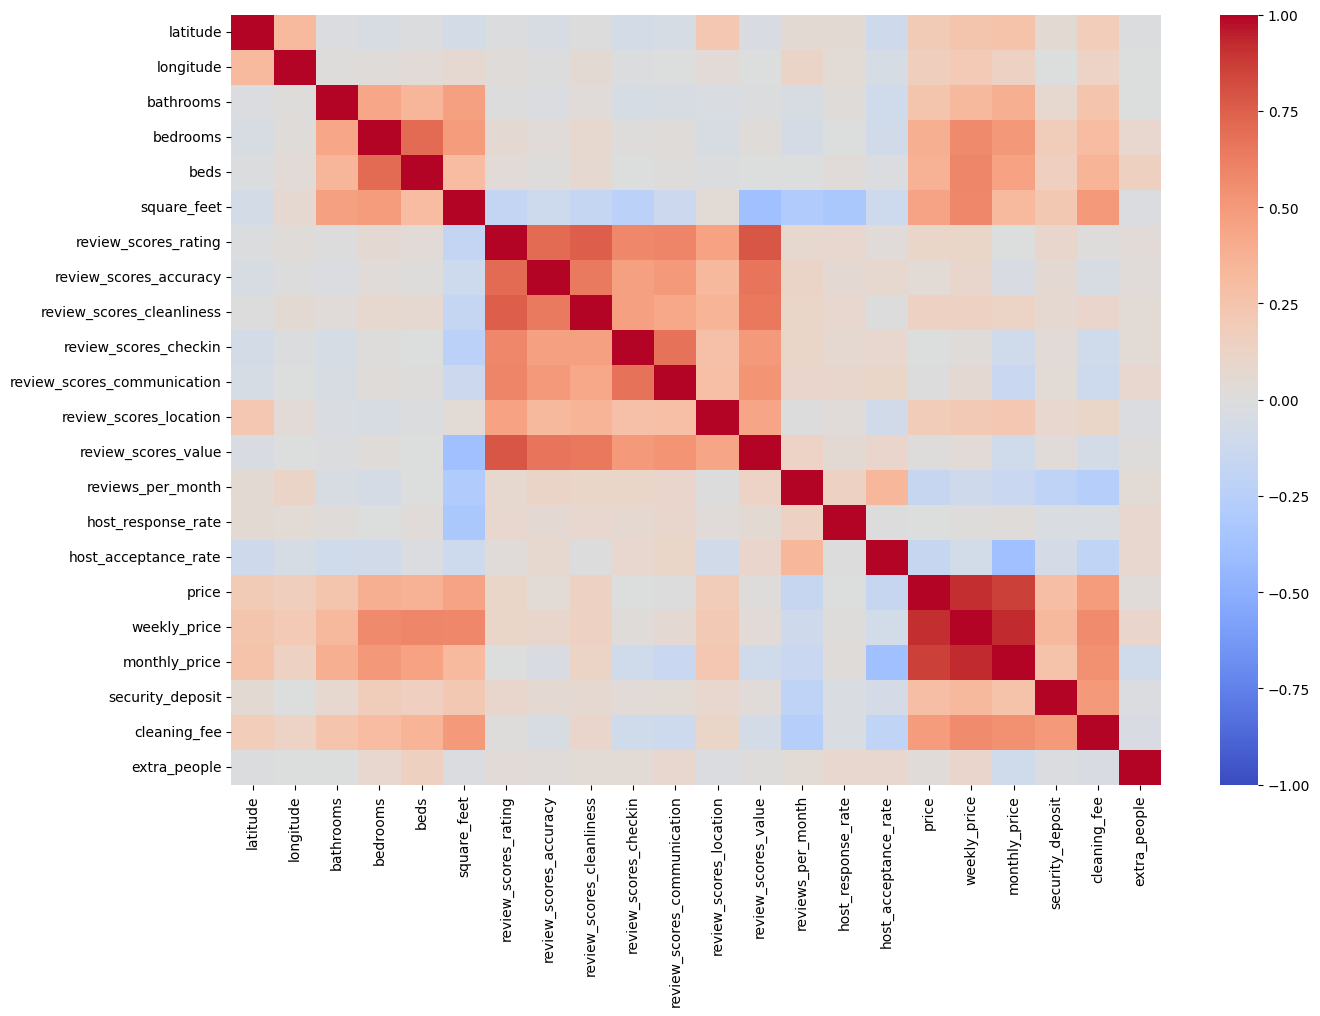

In [181]:
plt.figure(figsize=(15,10))
sns.heatmap(listings_numeric_df.corr(), cmap='coolwarm', vmin=-1, vmax=1);
plt.savefig('correlation.png')

The heatmap shows, that the prices (daily, weekly, etc.) correlate with each other and that the prices also correlate with the number of rooms (bedrooms, bathrooms, etc.). However, the bigger assets, with a higher square_feet value, tend to have worse ratings than smaler apartments. if we take alook into a few plots, we can see that aswell.

Text(0, 0.5, 'review_scores')

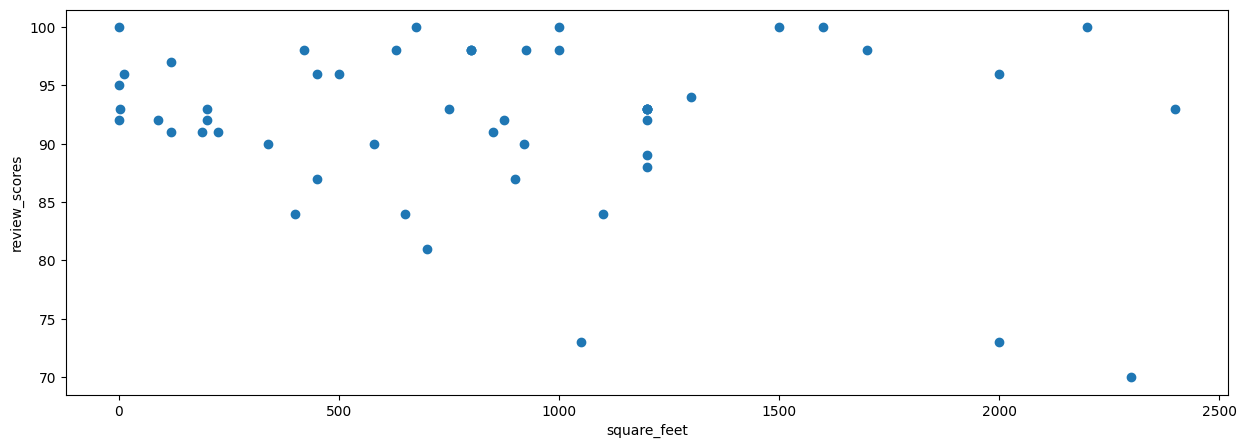

In [43]:
fig, ax = plt.subplots(1,1,figsize=(15,5))

ax.scatter(listings_numeric_df.square_feet, listings_numeric_df.review_scores_rating)
ax.set_xlabel('square_feet')
ax.set_ylabel('review_scores')

As it can be seen in the plot above, the negatiove correlation may be seen because of the lack of enough data. It seems like most of the listings do not have information about the square feet.

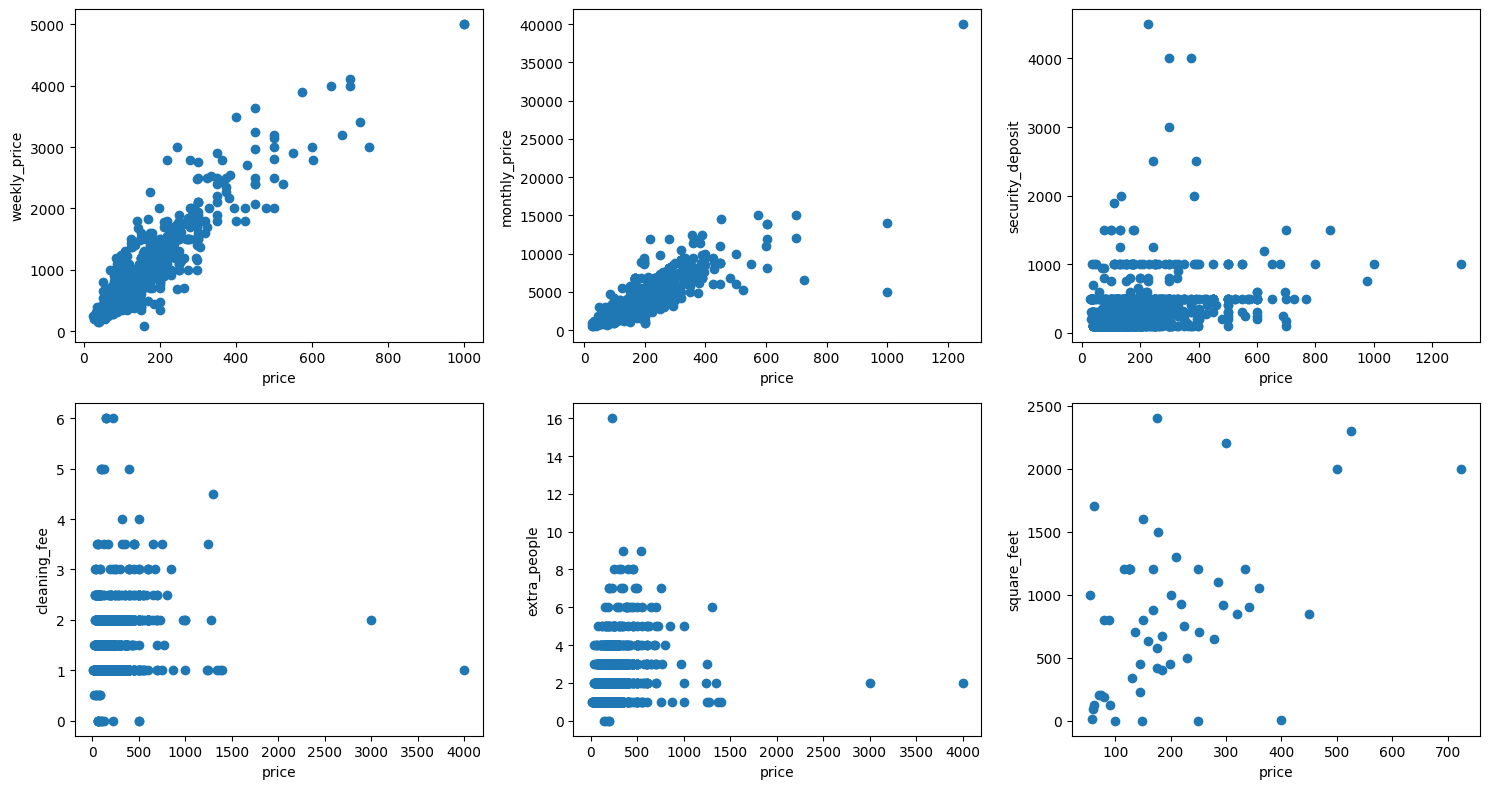

In [44]:
fig, ax = plt.subplots(2,3, figsize=(15,8))
ax[0,0].scatter(listings_numeric_df.price, listings_numeric_df.weekly_price)
ax[0,0].set_xlabel('price')
ax[0,0].set_ylabel('weekly_price')

ax[0,1].scatter(listings_numeric_df.price, listings_numeric_df.monthly_price)
ax[0,1].set_xlabel('price')
ax[0,1].set_ylabel('monthly_price')

ax[0,2].scatter(listings_numeric_df.price, listings_numeric_df.security_deposit)
ax[0,2].set_xlabel('price')
ax[0,2].set_ylabel('security_deposit')

ax[1,0].scatter(listings_numeric_df.price, listings_numeric_df.bathrooms)
ax[1,0].set_xlabel('price')
ax[1,0].set_ylabel('cleaning_fee')

ax[1,1].scatter(listings_numeric_df.price, listings_numeric_df.beds)
ax[1,1].set_xlabel('price')
ax[1,1].set_ylabel('extra_people')

ax[1,2].scatter(listings_numeric_df.price, listings_numeric_df.square_feet)
ax[1,2].set_xlabel('price')
ax[1,2].set_ylabel('square_feet')

plt.tight_layout()

In [45]:
listings_numeric_df.describe()

,latitude,longitude,bathrooms,bedrooms,beds,square_feet,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,review_scores_value,reviews_per_month,host_response_rate,host_acceptance_rate,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
count,3585.000000,3585.000000,3571.000000,3575.000000,3576.000000,56.000000,2772.000000,2762.000000,2767.000000,2765.000000,...,2764.000000,2829.000000,3114.000000,3114.000000,3585.000000,892.000000,888.000000,1342.000000,2478.000000,3585.000000
mean,42.340032,-71.084818,1.221647,1.255944,1.609060,858.464286,91.916667,9.431571,9.258041,9.646293,...,9.168234,1.970908,94.989082,84.173089,173.925802,922.392377,3692.097973,324.698212,68.380145,10.886192
std,0.024403,0.031565,0.501487,0.753060,1.011745,608.874310,9.531686,0.931863,1.168977,0.762753,...,1.011116,2.120561,12.517686,21.779254,148.331321,657.821817,2899.963733,328.873075,51.297835,19.137773
min,42.235942,-71.171789,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,...,2.000000,0.010000,0.000000,0.000000,10.000000,80.000000,500.000000,95.000000,5.000000,0.000000
25%,42.329995,-71.105083,1.000000,1.000000,1.000000,415.000000,89.000000,9.000000,9.000000,9.000000,...,9.000000,0.480000,97.000000,71.000000,85.000000,466.750000,1600.000000,100.000000,25.000000,0.000000
50%,42.345201,-71.078429,1.000000,1.000000,1.000000,825.000000,94.000000,10.000000,10.000000,10.000000,...,9.000000,1.170000,100.000000,94.000000,150.000000,750.000000,2925.000000,250.000000,50.000000,0.000000
75%,42.354685,-71.062155,1.000000,2.000000,2.000000,1200.000000,98.250000,10.000000,10.000000,10.000000,...,10.000000,2.720000,100.000000,100.000000,220.000000,1200.000000,5000.000000,450.000000,100.000000,20.000000
max,42.389982,-71.000100,6.000000,5.000000,16.000000,2400.000000,100.000000,10.000000,10.000000,10.000000,...,10.000000,19.150000,100.000000,100.000000,4000.000000,5000.000000,40000.000000,4500.000000,300.000000,200.000000


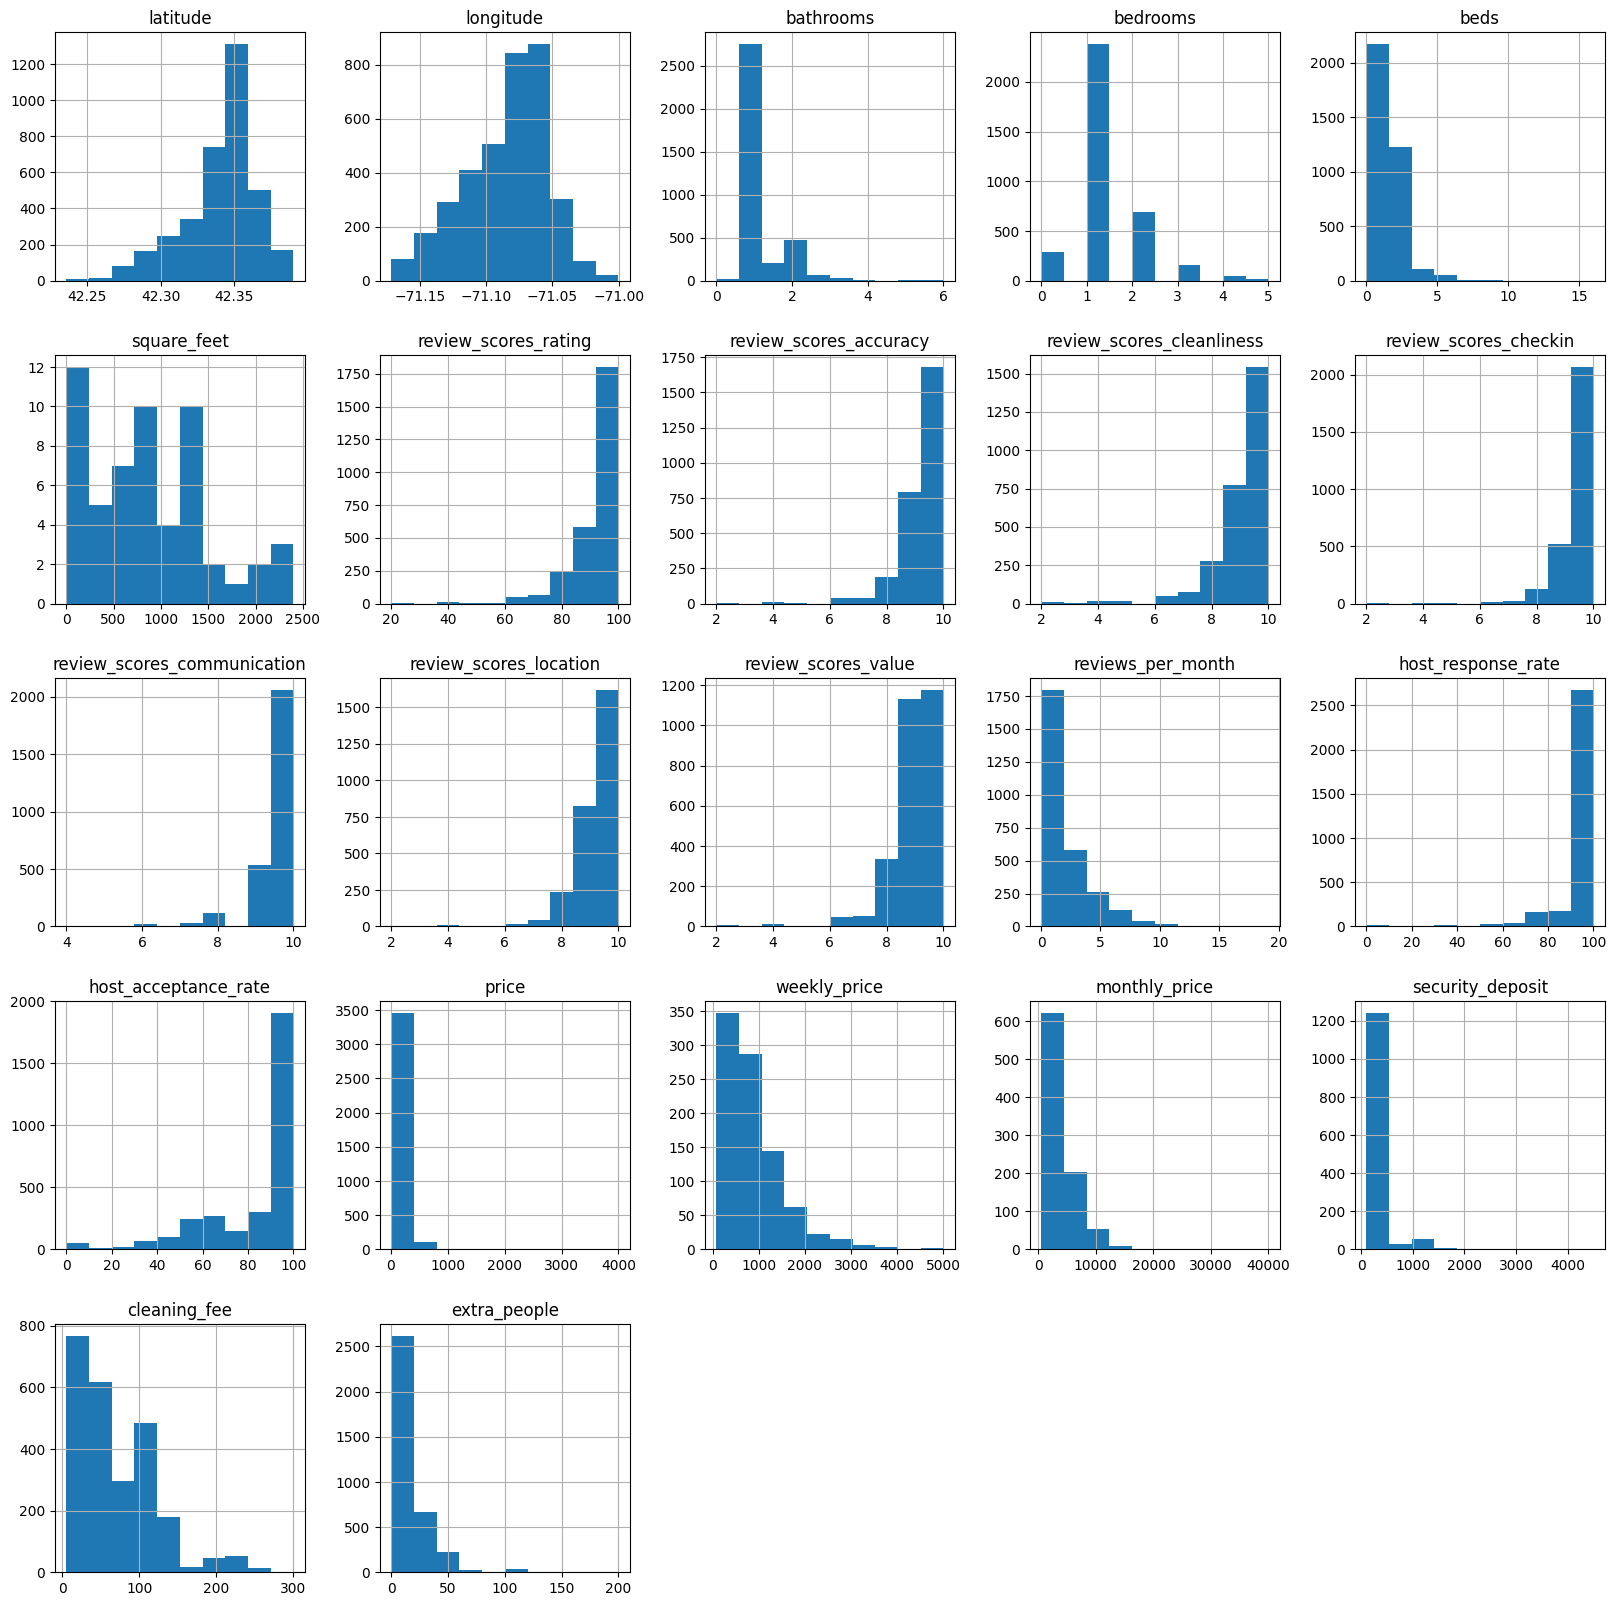

In [46]:
listings_numeric_df.hist(figsize=(20,20));

## Summary

In Summary, we can see that most of the data do not correlate linearly. And the data does not need aditional preparation in order to answer the questions mentioned in the chapter buisness understanding.

# Data Modelling - Answering the questions
## Question 1: What makes an asset valuable?

To answer this question, we first have to group the listings in such a way. This is due to the variety of listings and their different apartment types. For that we can already use. For that, we are going to model the price of the assets using different data using an random forest regressor.

In [47]:
listings_bool_df.columns

Index(['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'is_location_exact', 'instant_bookable',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')

In [48]:
listings_str_df.property_type.unique()

array(['House', 'Apartment', 'Condominium', 'Villa', 'Bed & Breakfast',
       'Townhouse', 'Entire Floor', 'Loft', 'Guesthouse', 'Boat', 'Dorm',
       'Other', nan, 'Camper/RV'], dtype=object)

### Feature selection
As a first approach we are selecting the features manually, based on what is generally considered to represent the value of a asset (number of bedrooms, area in which the asset is in, asset type, etc.).

In [49]:
target = 'price'

features_str = ['property_type', 'room_type', 'bed_type']
features_num = ['latitude', 'longitude', 'bedrooms','beds','bathrooms', 'price']

In order to use the string-data in our model, we need to replace the strings with a value.  
For the these data we can use the pandas `get_dummies` function to give our categorical data numeric values. 

In [50]:
features_str = listings_str_df.loc[:,features_str]
features_num = listings_numeric_df.loc[:,features_num]

In [51]:
features_cat = pd.get_dummies(features_str, dummy_na=True)

In [52]:
pd.DataFrame(features_num)

,latitude,longitude,bedrooms,beds,bathrooms,price
id,,,,,,
12147973,42.282619,-71.133068,2.0,3.0,1.5,250.0
3075044,42.286241,-71.134374,1.0,1.0,1.0,65.0
6976,42.292438,-71.135765,1.0,1.0,1.0,65.0
1436513,42.281106,-71.121021,1.0,2.0,1.0,75.0
7651065,42.284512,-71.136258,1.0,2.0,1.5,79.0
...,...,...,...,...,...,...
8373729,42.380968,-71.083795,1.0,1.0,1.0,69.0
14844274,42.347503,-71.118336,1.0,1.0,1.0,150.0
14585486,42.371771,-71.071300,1.0,1.0,1.0,198.0


In [53]:
from sklearn.preprocessing import StandardScaler
feature_index = features_num.index
feature_columns = features_num.columns
#features_num = StandardScaler().fit_transform(features_num)
#features_num = pd.DataFrame(features_num, index=feature_index, columns=feature_columns)

features = pd.concat([features_cat, features_num], join='inner', axis=1)

In [54]:
features.head()

,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Camper/RV,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,...,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,latitude,longitude,bedrooms,beds,bathrooms,price
id,,,,,,,,,,,,,,,,,,,,,
12147973,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,42.282619,-71.133068,2.0,3.0,1.5,250.0
3075044,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,42.286241,-71.134374,1.0,1.0,1.0,65.0
6976,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,42.292438,-71.135765,1.0,1.0,1.0,65.0
1436513,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,42.281106,-71.121021,1.0,2.0,1.0,75.0
7651065,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,42.284512,-71.136258,1.0,2.0,1.5,79.0


### Handling missing values
We want to predict the price and therefore we can drop all rows, that do not contain a price

In [55]:
features.dropna(subset=['price'], inplace=True)
features.head()

,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Camper/RV,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,...,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,latitude,longitude,bedrooms,beds,bathrooms,price
id,,,,,,,,,,,,,,,,,,,,,
12147973,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,42.282619,-71.133068,2.0,3.0,1.5,250.0
3075044,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,42.286241,-71.134374,1.0,1.0,1.0,65.0
6976,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,42.292438,-71.135765,1.0,1.0,1.0,65.0
1436513,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,42.281106,-71.121021,1.0,2.0,1.0,75.0
7651065,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,42.284512,-71.136258,1.0,2.0,1.5,79.0


In [56]:
(features.shape[0]-features.describe().loc['count'])/features.shape[0] * 100

property_type_Apartment          0.000000
property_type_Bed & Breakfast    0.000000
property_type_Boat               0.000000
property_type_Camper/RV          0.000000
property_type_Condominium        0.000000
property_type_Dorm               0.000000
property_type_Entire Floor       0.000000
property_type_Guesthouse         0.000000
property_type_House              0.000000
property_type_Loft               0.000000
property_type_Other              0.000000
property_type_Townhouse          0.000000
property_type_Villa              0.000000
property_type_nan                0.000000
room_type_Entire home/apt        0.000000
room_type_Private room           0.000000
room_type_Shared room            0.000000
room_type_nan                    0.000000
bed_type_Airbed                  0.000000
bed_type_Couch                   0.000000
bed_type_Futon                   0.000000
bed_type_Pull-out Sofa           0.000000
bed_type_Real Bed                0.000000
bed_type_nan                     0

We can see that we still have missing values, but since its only three columns with about 0.4% of missing data, we can simply drop that rows as well.

In [57]:
features.dropna(inplace=True)

### Modelling the data
Now that we have prepared our data and got our training features ready, we can start modelling the data. We will train a reandom forest regressor in order to predict the price of an asset.
First of all, we have to split our data into train and test datasets. We are going to use the train_test_split method from sklearn for that.

In [58]:
features_train, features_test, target_train, target_test = modsel.train_test_split(features.drop('price', axis=1),
                                                                                   features.loc[:,'price'],
                                                                                   test_size=0.4,
                                                                                   random_state=1)


In [59]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(criterion='squared_error',
                              n_estimators=1000,
                              max_depth=10,
                              min_samples_split=10,
                              min_samples_leaf=5                              
                             )

def rms(y):
    return np.sqrt(np.mean(y**2))

count    1423.000000
mean        4.237155
std        91.716764
min     -1093.017324
25%       -22.024044
50%         9.422438
75%        39.644200
max       338.553504
Name: price, dtype: float64

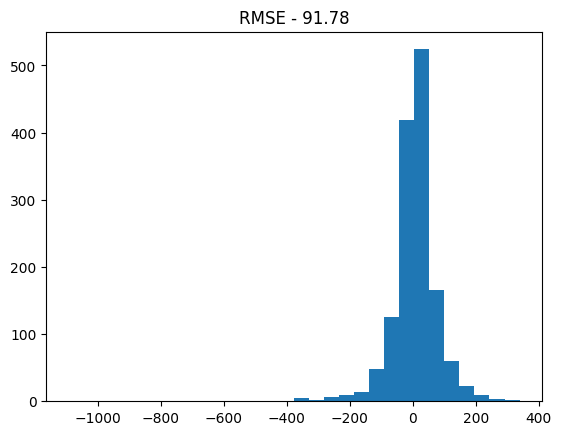

In [60]:
predictor = model.fit(features_train, target_train)

predictions = predictor.predict(features_test)
residuals = predictions-target_test

plt.hist(residuals, bins=30);
plt.title('RMSE - %.2f' % rms(residuals));
residuals.describe()

We can see that the distributuion of the residulas in very narrow and therfore we can assume that our model performs good enough to be trustworthy.  
In order to find out, which feature is the most important for the price prediction, we are going to eliminate one feature at a time and find the features with the highest impact on the root mean square error.  
We will use the recursive feature elimination method provided by sklear.

In [61]:
from sklearn.feature_selection import RFE

n_features = 7
selector = RFE(predictor, n_features_to_select=n_features, step=2, verbose=1)

In [62]:
selector = selector.fit(features_train.to_numpy(), target_train.to_numpy().reshape(-1, 1))

Fitting estimator with 29 features.
Fitting estimator with 27 features.
Fitting estimator with 25 features.
Fitting estimator with 23 features.
Fitting estimator with 21 features.
Fitting estimator with 19 features.
Fitting estimator with 17 features.
Fitting estimator with 15 features.
Fitting estimator with 13 features.
Fitting estimator with 11 features.
Fitting estimator with 9 features.


In [63]:
support = selector.get_support()


top_features_col = features_train.columns[support]
top_features = features[top_features_col]

top_features_col


Index(['property_type_Apartment', 'room_type_Entire home/apt', 'latitude',
       'longitude', 'bedrooms', 'beds', 'bathrooms'],
      dtype='object')

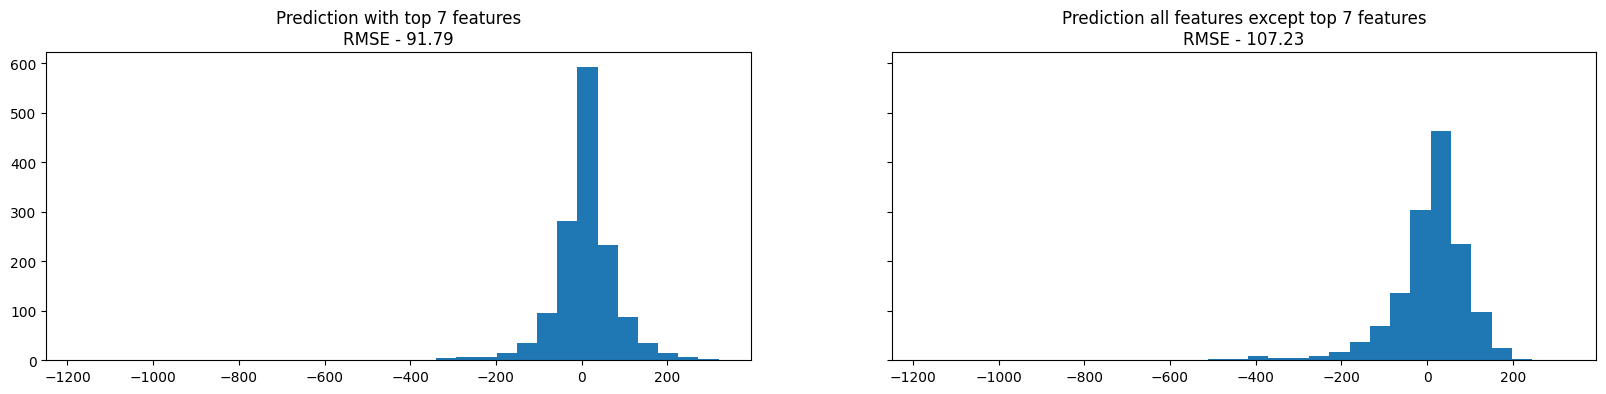

In [64]:
fig, ax = plt.subplots(1,2, figsize=(20,4), sharey=True, sharex=True)

# just top features
predictor = model.fit(features_train[features_train.columns[support]], target_train)

predictions = predictor.predict(features_test[features_train.columns[support]])
residuals = predictions-target_test

ax[0].hist(residuals, bins=30);
ax[0].set_title('Prediction with top %i features\nRMSE - %.2f' % (n_features, rms(residuals))); 

# except top features
predictor = model.fit(features_train[features_train.columns[~support]], target_train)

predictions = predictor.predict(features_test[features_train.columns[~support]])
residuals = predictions-target_test

ax[1].hist(residuals, bins=30);
ax[1].set_title('Prediction all features except top %i features\nRMSE - %.2f' % (n_features, rms(residuals)));

As we can see here, there is nothing surprising. Bedrooms, bathrooms, etc. have the highest impact on the price, since more bedrooms means that more people can sleep in the same apartment. Therefore we have to manually rescale the data. Hence we will divide the price by the number of beds, which will lead to a relative per beds and therefore per person and reexecute our search.

In [65]:
features.price = features.price/features.beds

In [66]:
selector = selector.fit(features_train.to_numpy(), target_train.to_numpy().reshape(-1, 1))

support = selector.get_support()

features_train.columns[support]

Fitting estimator with 29 features.
Fitting estimator with 27 features.
Fitting estimator with 25 features.
Fitting estimator with 23 features.
Fitting estimator with 21 features.
Fitting estimator with 19 features.
Fitting estimator with 17 features.
Fitting estimator with 15 features.
Fitting estimator with 13 features.
Fitting estimator with 11 features.
Fitting estimator with 9 features.


Index(['property_type_Apartment', 'room_type_Entire home/apt', 'latitude',
       'longitude', 'bedrooms', 'beds', 'bathrooms'],
      dtype='object')

As we can see, nothing changed.

### Answer
In conclusion, we can see, that the factors that determine the price of an listing the most are:
1. The proprty and room type (Apartments, where you have the whole home/apartment for your self are the most expensive)
1. The number of rooms (bathrooms, bedrooms, and beds)
1. And the place, your apartment is at.

## Question 2: How can you enhance the value of your appartment?

If you have an appartment, you do not have the oportunity to enhance your asset by adding bedrooms, but you can add other amenities. Lets find out, which one have the biggest impact.

### Data preparation
As we can see from the dataset, the amenities are not in a structured, useful form. Therefore we are going to perpare the data here aswell.

In [67]:
listings_str_df.amenities

id
12147973    {TV,"Wireless Internet",Kitchen,"Free Parking ...
3075044     {TV,Internet,"Wireless Internet","Air Conditio...
6976        {TV,"Cable TV","Wireless Internet","Air Condit...
1436513     {TV,Internet,"Wireless Internet","Air Conditio...
7651065     {Internet,"Wireless Internet","Air Conditionin...
                                  ...                        
8373729     {Internet,"Wireless Internet","Air Conditionin...
14844274    {TV,Internet,"Wireless Internet","Air Conditio...
14585486    {"translation missing: en.hosting_amenity_49",...
14603878    {Kitchen,Gym,"Family/Kid Friendly",Washer,Drye...
14504422    {"Wireless Internet",Kitchen,Essentials,"trans...
Name: amenities, Length: 3585, dtype: object

In [68]:
listings_str_df.head(1)

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,...,market,smart_location,property_type,room_type,bed_type,amenities,calendar_updated,first_review,last_review,cancellation_policy
id,,,,,,,,,,,,,,,,,,,,,
12147973,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...","Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,...,Boston,"Boston, MA",House,Entire home/apt,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",2 weeks ago,NaN,NaN,moderate


In [69]:
amenities_list = [ iamenity.replace('"','').replace('{','').replace('}','').split(',') for iamenity in listings_str_df.amenities ]

# flatten list
amenities_flat = [iamenties for sublist in amenities_list for iamenties in sublist]
# get unique entries
amenities_unique = set(amenities_flat)

amenities_list = pd.DataFrame(amenities_list, index=listings_str_df.index)
amenities = pd.DataFrame(columns=list(amenities_unique), index=listings_str_df.index)

In [70]:
# fill nans
for iid, iamenities in amenities_list.iterrows():
    amenities.loc[iid,:] = 0
    amenities.loc[iid, iamenities.dropna()] = 1

In [71]:
amenities.drop(['','translation missing: en.hosting_amenity_49','translation missing: en.hosting_amenity_50'], axis=1, inplace=True)

In [72]:
amenities_w_price = pd.concat([amenities, pd.DataFrame(listings_numeric_df.loc[:,'price'], index=listings_numeric_df.index)], axis=1)

### Predicting price with amenities

In [73]:
features_train, features_test, target_train, target_test = modsel.train_test_split(amenities_w_price.drop('price', axis=1),
                                                                                   amenities_w_price.loc[:,'price'],
                                                                                   test_size=0.4,
                                                                                   random_state=1)

n_features = 14
selector = RFE(predictor, n_features_to_select=n_features, step=3, verbose=1)
selector = selector.fit(features_train.to_numpy(), target_train.to_numpy().reshape(-1, 1))

support = selector.get_support()

features_train.columns[support]

Fitting estimator with 43 features.
Fitting estimator with 40 features.
Fitting estimator with 37 features.
Fitting estimator with 34 features.
Fitting estimator with 31 features.
Fitting estimator with 28 features.
Fitting estimator with 25 features.
Fitting estimator with 22 features.
Fitting estimator with 19 features.
Fitting estimator with 16 features.


Index(['Internet', 'Buzzer/Wireless Intercom', 'Cable TV', 'Fire Extinguisher',
       'Free Parking on Premises', 'First Aid Kit', 'Family/Kid Friendly',
       'Hair Dryer', '24-Hour Check-in', 'Air Conditioning', 'Washer',
       'Elevator in Building', 'TV', 'Lock on Bedroom Door'],
      dtype='object')

In [74]:
features_train[features_train.columns[support]]

,Internet,Buzzer/Wireless Intercom,Cable TV,Fire Extinguisher,Free Parking on Premises,First Aid Kit,Family/Kid Friendly,Hair Dryer,24-Hour Check-in,Air Conditioning,Washer,Elevator in Building,TV,Lock on Bedroom Door
id,,,,,,,,,,,,,,
4178790,1,0,0,1,0,0,1,1,0,1,1,0,1,0
12365454,1,1,1,0,0,0,1,1,0,1,1,0,1,0
11043756,0,0,0,1,0,1,0,1,1,0,0,0,0,0
13752754,0,0,0,1,0,0,0,1,0,1,0,0,1,0
3946215,1,0,1,0,0,1,0,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14242888,0,0,0,0,1,1,1,0,0,1,0,0,0,0
1197857,1,0,0,0,0,0,1,0,0,1,1,0,1,0
2513870,1,1,1,0,0,0,0,0,0,1,1,0,1,0


count    1434.000000
mean        3.071437
std       138.401897
min     -2727.274694
25%       -26.591101
50%        22.374715
75%        65.193200
max       370.602174
Name: price, dtype: float64

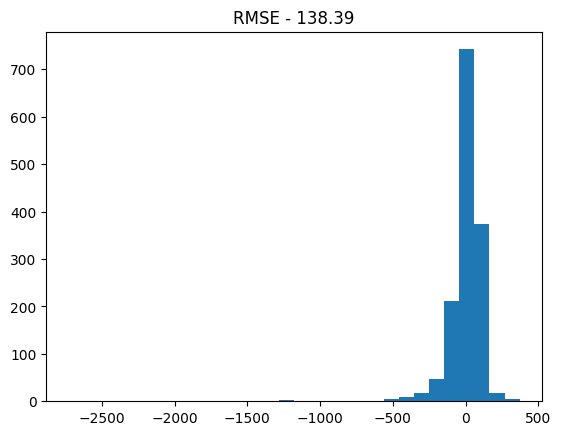

In [75]:
predictor = model.fit(features_train[features_train.columns[support]], target_train)

predictions = predictor.predict(features_test[features_train.columns[support]])
residuals = predictions-target_test

plt.hist(residuals, bins=30);
plt.title('RMSE - %.2f' % rms(residuals));
residuals.describe()

### Predicting price with amenities and top features

As we can see here, the feautres are not enough to predict the price properly. Therefore we are going to add the top features from the features above to see if we can see an improvement in the prediction, if we add t some of the amenities to the feature set. And since people who rent out smaller apartments probably are interested in other things than people who rent out bigger apartments, we will split the data set in less than 2 rooms and more than 2 bedrooms.

In [76]:
top_feature_amenities = pd.concat([amenities_w_price, top_features], axis=1)

In [77]:
top_feature_amenities.describe()

,price,property_type_Apartment,room_type_Entire home/apt,latitude,longitude,bedrooms,beds,bathrooms
count,3585.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000
mean,173.925802,0.728704,0.594040,42.340056,-71.084846,1.256958,1.612033,1.222519
std,148.331321,0.444691,0.491146,0.024443,0.031650,0.754652,1.013492,0.502280
min,10.000000,0.000000,0.000000,42.235942,-71.171789,0.000000,0.000000,0.000000
25%,85.000000,0.000000,0.000000,42.329995,-71.105300,1.000000,1.000000,1.000000
50%,150.000000,1.000000,1.000000,42.345230,-71.078429,1.000000,1.000000,1.000000
75%,220.000000,1.000000,1.000000,42.354788,-71.062130,2.000000,2.000000,1.000000
max,4000.000000,1.000000,1.000000,42.389982,-71.000100,5.000000,16.000000,6.000000


In [78]:
top_feature_amenities.dropna(inplace=True)

small_rooms_amenities = top_feature_amenities[top_feature_amenities.bedrooms <=2]
big_rooms_amenities = top_feature_amenities[top_feature_amenities.bedrooms >2]

In [79]:
features_train, features_test, target_train, target_test = modsel.train_test_split(small_rooms_amenities.drop('price', axis=1),
                                                                                   small_rooms_amenities.loc[:,'price'],
                                                                                   test_size=0.4,
                                                                                   random_state=1)

n_features = 14
selector = RFE(predictor, n_features_to_select=n_features, step=3, verbose=1)
selector = selector.fit(features_train.to_numpy(), target_train.to_numpy().reshape(-1, 1))

support = selector.get_support()

features_train.columns[support]

Fitting estimator with 50 features.
Fitting estimator with 47 features.
Fitting estimator with 44 features.
Fitting estimator with 41 features.
Fitting estimator with 38 features.
Fitting estimator with 35 features.
Fitting estimator with 32 features.
Fitting estimator with 29 features.
Fitting estimator with 26 features.
Fitting estimator with 23 features.
Fitting estimator with 20 features.
Fitting estimator with 17 features.


Index(['Buzzer/Wireless Intercom', 'Free Parking on Premises', 'Hair Dryer',
       'Kitchen', 'Pets Allowed', 'Essentials', 'Smoke Detector', 'Gym',
       'room_type_Entire home/apt', 'latitude', 'longitude', 'bedrooms',
       'beds', 'bathrooms'],
      dtype='object')

count    1337.000000
mean        0.417441
std       150.852334
min     -3778.927967
25%       -17.400871
50%        10.119310
75%        41.372912
max       266.104353
Name: price, dtype: float64

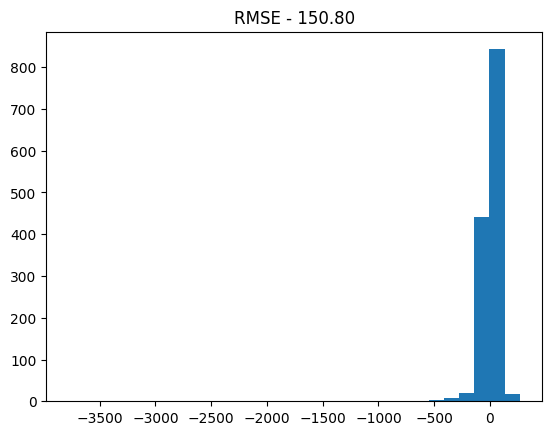

In [80]:
predictor = model.fit(features_train[features_train.columns[support]], target_train)

predictions = predictor.predict(features_test[features_train.columns[support]])
residuals = predictions-target_test

plt.hist(residuals, bins=30);
plt.title('RMSE - %.2f' % rms(residuals));
residuals.describe()

In [81]:
features_train, features_test, target_train, target_test = modsel.train_test_split(big_rooms_amenities.drop('price', axis=1),
                                                                                   big_rooms_amenities.loc[:,'price'],
                                                                                   test_size=0.4,
                                                                                   random_state=1)

n_features = 14
selector = RFE(predictor, n_features_to_select=n_features, step=3, verbose=1)
selector = selector.fit(features_train.to_numpy(), target_train.to_numpy().reshape(-1, 1))

support = selector.get_support()

features_train.columns[support]

Fitting estimator with 50 features.
Fitting estimator with 47 features.
Fitting estimator with 44 features.
Fitting estimator with 41 features.
Fitting estimator with 38 features.
Fitting estimator with 35 features.
Fitting estimator with 32 features.
Fitting estimator with 29 features.
Fitting estimator with 26 features.
Fitting estimator with 23 features.
Fitting estimator with 20 features.
Fitting estimator with 17 features.


Index(['Internet', 'Dryer', 'Fire Extinguisher', 'Indoor Fireplace',
       'Free Parking on Premises', 'Dog(s)', 'First Aid Kit',
       '24-Hour Check-in', 'Pets live on this property', 'latitude',
       'longitude', 'bedrooms', 'beds', 'bathrooms'],
      dtype='object')

count     87.000000
mean      12.956043
std      146.668667
min     -754.796910
25%      -57.573925
50%       26.508478
75%      100.519240
max      301.034970
Name: price, dtype: float64

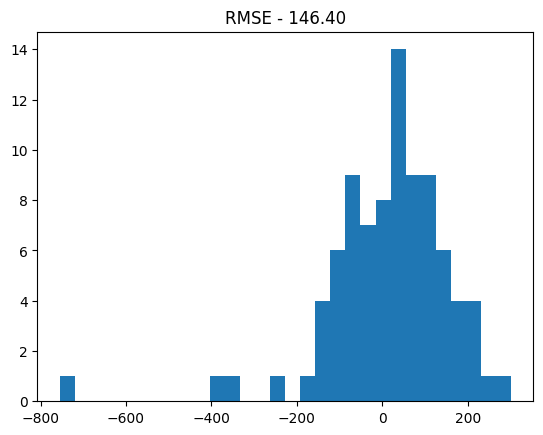

In [82]:
predictor = model.fit(features_train[features_train.columns[support]], target_train)

predictions = predictor.predict(features_test[features_train.columns[support]])
residuals = predictions-target_test

plt.hist(residuals, bins=30);
plt.title('RMSE - %.2f' % rms(residuals));
residuals.describe()

### Answer
For owners of small apartments, it is recommended to provide basic like cable TV, a hair dryer or some essentials. This things need can be adjusted by hosts pretty easily and can help to enhance the value of their asset.  
For owner of bigger apartments, it is a bit more complicated. People who rent bigger apartments are more interested in things like an indoor fireplace or animals on the property (probabily like a farm). But even the owner of bigger apartments can enhance their properties value by making a fir extinguisher available, providing a 24h Check in or allowing dogs on the property. Which is associated with low expanses for the hosts as well. 

## Question 3: When is the best time to book?
In order to answer that question, we have to change the datasets now and analyse the calendar dataset. First we are going to take a look into the time series of prices per year to get a first impression of the data.

In [83]:
calendar.reset_index(inplace=True)
calendar.set_index(['date','listing_id'], inplace=True)

In [84]:
unique_listing_ids = calendar.index.get_level_values(1).unique()

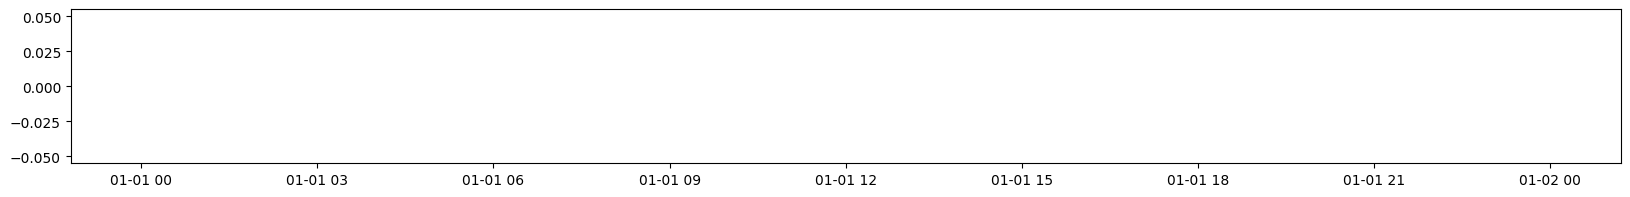

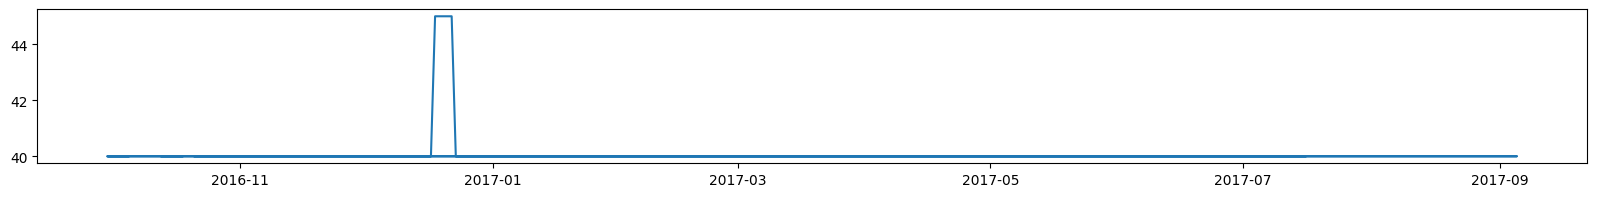

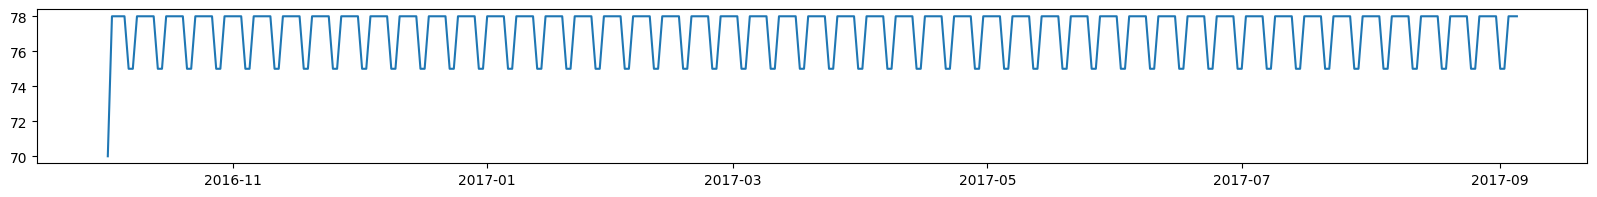

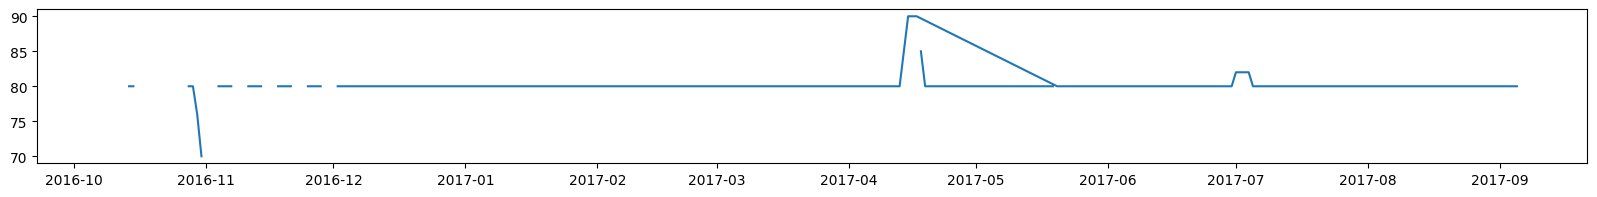

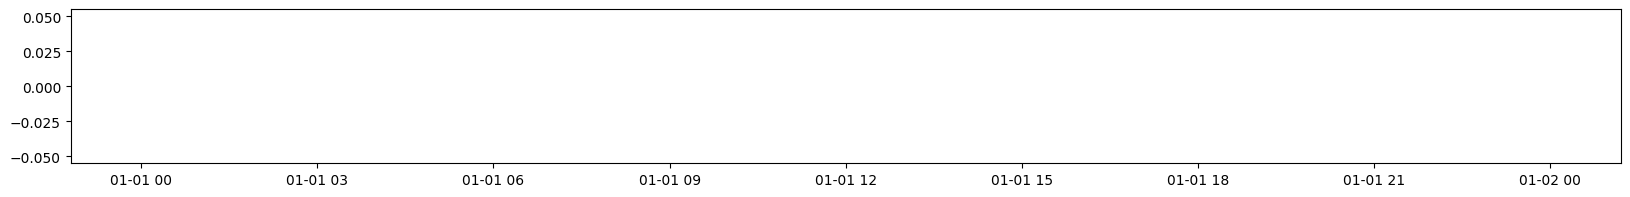

In [85]:
for i in range(0, 100, 20):
    plt.figure(figsize=(20, 2))
    plt.plot(calendar.loc[(slice(None), unique_listing_ids[i]), 'price'].index.get_level_values(0),
             calendar.loc[(slice(None), unique_listing_ids[i]), 'price'])

### Data cleaning
We can see here, that we have a few listings, that do not have any data. Therefore, we can drop them.

In [86]:
listings_before = len(calendar.index.get_level_values(1).unique())

for iindex, iprices in calendar.price.groupby(level=1):
    if iprices.isna().all():
        calendar.drop(iindex, level=1, inplace=True)
        
listings_after = len(calendar.index.get_level_values(1).unique())

print('%i listings from %i dropped. %i listings left' % (listings_before-listings_after, listings_before, listings_after))

679 listings from 3585 dropped. 2906 listings left


### Calculating the prices
For the left listings, it would make sens to take a look at the mean, the min and the max value for each day. But since the min and max values are sensitive to outliers, we are going to calculate different quantile instead.

In [173]:
time_chunks = pd.date_range(min(calendar.index.get_level_values(0)),
                            max(calendar.index.get_level_values(0))
                           )

prices_agg = {}
for iday in time_chunks:
    temp_agg={}
    #idx=pd.IndexSlice
    temp_data=calendar.loc[(iday,), 'price']
    temp_agg = {
        '0.2q': np.nanquantile(temp_data,0.2),
        '0.3q': np.nanquantile(temp_data,0.3),
        '0.4q': np.nanquantile(temp_data,0.4),
        '0.6q': np.nanquantile(temp_data,0.6),
        '0.7q': np.nanquantile(temp_data,0.7),
        '0.8q': np.nanquantile(temp_data,0.8),
        'mean':np.nanmean(temp_data),
        'median':np.nanmedian(temp_data)
    }
    prices_agg[iday] = temp_agg

prices_agg = pd.DataFrame(prices_agg).T

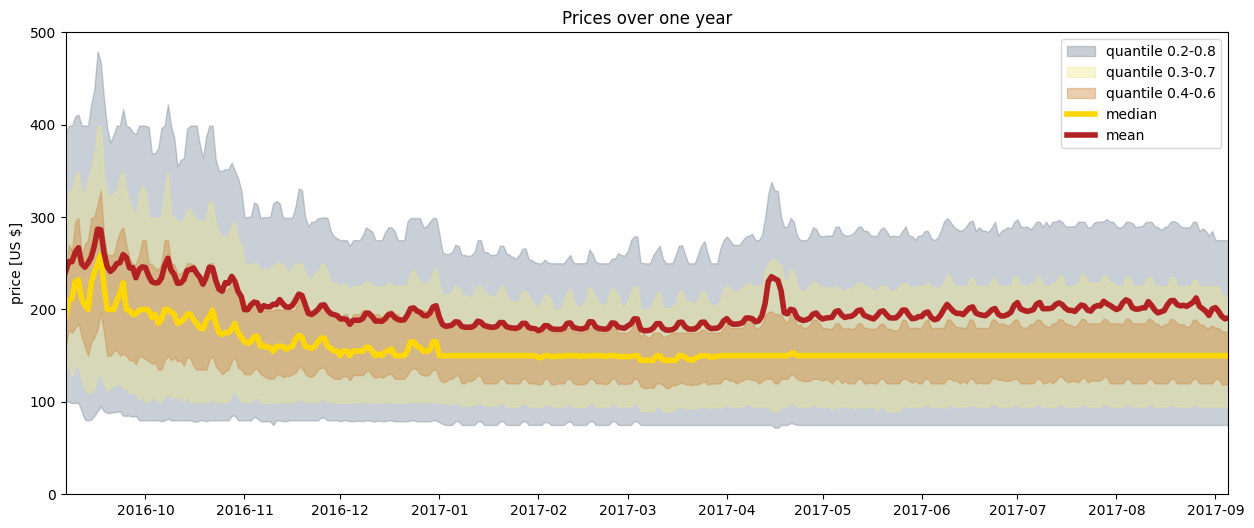

In [180]:
plt.figure(figsize=(15,6))
plt.fill_between(prices_agg.index, prices_agg['0.2q'],prices_agg['0.8q'], alpha=0.4,color='lightslategray')
plt.fill_between(prices_agg.index, prices_agg['0.3q'],prices_agg['0.7q'], alpha=0.4,color='khaki')
plt.fill_between(prices_agg.index, prices_agg['0.4q'],prices_agg['0.6q'], alpha=0.4,color='peru')
plt.plot(prices_agg.index, prices_agg['median'], linewidth=4,color='gold')
plt.plot(prices_agg.index, prices_agg['mean'], linewidth=4,color='firebrick')

plt.legend(['quantile 0.2-0.8','quantile 0.3-0.7','quantile 0.4-0.6', 'median', 'mean'])

plt.ylim([0,500])
plt.xlim([np.nanmin(prices_agg.index), np.nanmax(prices_agg.index)])

plt.title('Prices over one year')
plt.ylabel('price [US $]')
plt.savefig('prices_year.png')

### Answer
We can see that the prices are usually a lot higher in autumn, starting in September. The prices stay quite high until the beginning of November and reach their low in late winter in January and stay quite low until April. This shows that the demand on listings is the highest in autumn, and the best time to get a cheap stay in Boston is from January until April.